In [1]:
%matplotlib notebook

In [2]:
#Make sure psycogp2 is installed using anaconda

# Import SQLAlchemy `automap` and other dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#---------------------------------------------
#Please enter the following information:
#---------------------------------------------
user=""
password=""
db=""
#---------------------------------------------
#Validate the user enter the parameters
if user == "":
    raise ValueError("user is not defined")
if password == "":
    raise ValueError("password is not defined")
if db == "":
    raise ValueError("db is not defined")
host="localhost"

In [5]:
#Connect to the database
url = 'postgresql://{}:{}@{}/{}'
url = url.format(user, password, host, db)
engine = create_engine(url)
meta = sqlalchemy.MetaData(engine)
connection = engine.connect()

In [6]:
#Get tables form the database to make sure the connection is rigth
msg = "| Tables in teh data base |"
print("-"*len(msg))
print(msg)
print("-"*len(msg))
meta.reflect(engine)
for table in meta.sorted_tables:
    print(table)
print("-"*len(msg))

---------------------------
| Tables in teh data base |
---------------------------
departments
employees
dept_emp
dept_manager
salaries
titles
---------------------------


In [7]:
#Create the query
query=""
query+="SELECT"
query+=" employees.emp_no,"
query+=" titles.title,"
query+=" salaries.salary"
query+=" FROM employees, titles, salaries"
query+=" WHERE employees.emp_no = titles.emp_no AND"
query+=" employees.emp_no = salaries.emp_no"

In [8]:
#Query the data
data = pd.read_sql(query, connection)

In [9]:
#Group by title to do the salary average
average_salary = data.groupby("title").mean()

In [10]:
#Show the new data frame
average_salary

,emp_no,salary
title,,
Assistant Engineer,251495.398533,48493.204786
Engineer,252943.159987,48539.781423
Manager,110780.833333,51531.041667
Senior Engineer,253034.375949,48506.751806
Senior Staff,253423.367183,58503.286614
Staff,253399.240672,58465.271904
Technique Leader,251708.951052,48580.505772


<IPython.core.display.Javascript object>


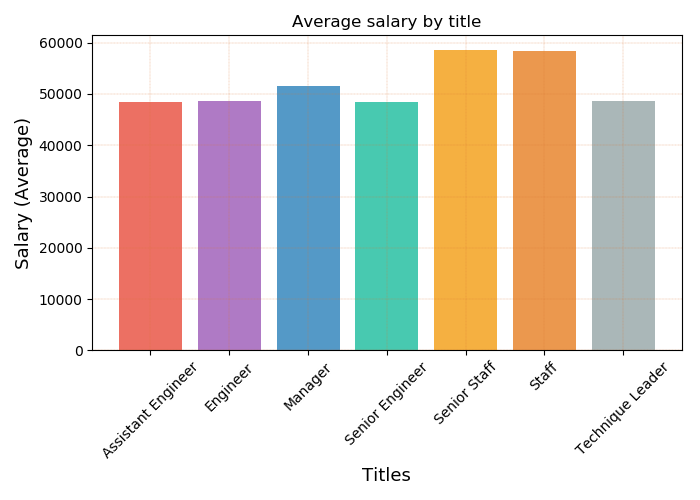

In [11]:
#Plot the reults
title_plot = plt.figure(figsize=(7,5))
plt.bar(average_salary.index.values,\
        average_salary["salary"],
        color=["#EC7063","#AF7AC5","#5499C7","#48C9B0","#F5B041","#EB984E","#AAB7B8"])

plt.title("Average salary by title")
plt.xlabel("Titles",fontsize=13)
plt.ylabel("Salary (Average)",fontsize=13)
plt.grid(color="#DC7633",linewidth=0.2,linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Steps taken in the homework

#### 1.- Data inspection:
Look at each csv file to get to know the data structure per table to determine what can we use as primary key and foreign keys

#### 2.- Create an ERD
Create the diagram to illustrate how the data is related

#### 3.- Define schema and load the data
Execute the queries for schema creation and import the csv file in Postgres

#### 4.- Queries
Create the queries for each analysis considering how the data Is related and the correlation between tables using the keys

#### 5.- Postgres and sqlalchemy integration:
- Review the sqlalchemy documentation for Postgres connection
- Install psycogp2 using anaconda 
- Build the URL with the new format (host, credentials and database name)
- Create the connection
- Query the data using pandas
- use matplotlib for visualization
